## Artificial Intelligence in Business Analysis

### Homework 1

Data Touring 2 내의 Sunspots, Trees, iris data에 대해 python 코드로 구현합니다

#### import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset

#### Sunspots

In [2]:
sunspots = get_rdataset('sunspots').data
sunspots.head()

,time,value
0,1749.000000,58.0
1,1749.083333,62.6
2,1749.166667,70.0
3,1749.250000,55.7
4,1749.333333,85.0


In [3]:
def myPlot(index : pd.Series, data : pd.Series, title : str, xlabel : str, ylabel : str) -> plt.plot :
    fig, ax = plt.subplots(figsize = (10, 4))
    ax.scatter(x = index, y = data, marker = '.', color = 'k', label = 'Observed')
    ax.legend()
    ax.grid(False)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, fontsize = 12, fontfamily = 'Serif')
    return ax

def main() : 
    myPlot(index = sunspots.time,
           data = sunspots.value,
           title = 'Sunspots Data',
           xlabel = 'time(year)',
           ylabel = 'monthly average no sunspots')

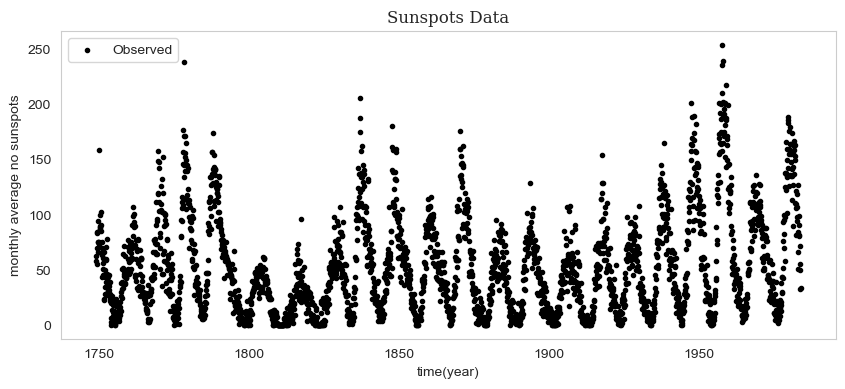

In [4]:
if __name__ == '__main__' : main()

***LOESS Smoothing***

In [5]:
import statsmodels.api as sm
loess = sm.nonparametric.lowess(sunspots.value, np.arange(len(sunspots)), frac = 36 / len(sunspots)) # frac based on Lecture notes
loess = pd.DataFrame(loess[:,1], columns = ['LOESS'], index = sunspots.time)

In [6]:
def main() : 
    myPlot(index = sunspots.time,
           data = sunspots.value,
           title = 'Sunspots Data',
           xlabel = 'time(year)',
           ylabel = 'monthly average no sunspots');
    plt.plot(loess, color = 'red') # loess regression

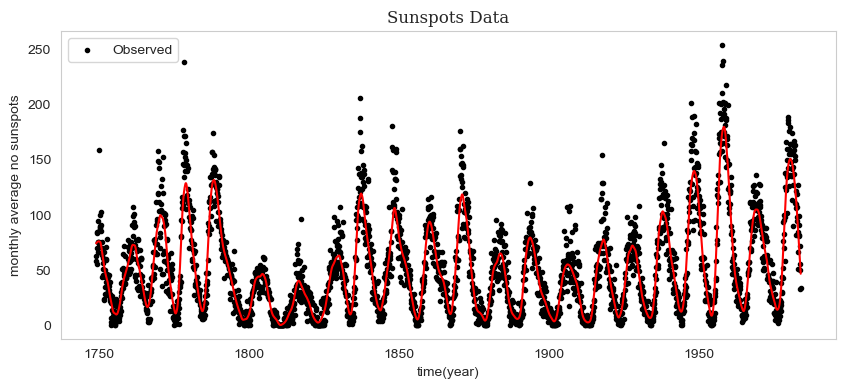

In [7]:
if __name__ == '__main__' : main()

### Trees Data

체리나무 31그루에 대하여, Girth, Heights, Volume 세 변수를 측정한 자료이다

In [8]:
trees = get_rdataset('trees').data
trees.head(5)

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


***pair plots***

In [23]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_style('white')
def myPairPlot(data : pd.DataFrame, title : str) -> plt.plot :
    graph = sns.pairplot(data, 
                         diag_kind = "kde", 
                         markers = ".", 
                         kind = "reg", 
                         diag_kws = {'bw_method': 0.2})
    for i, j in zip(*plt.np.triu_indices_from(graph.axes, 1)) :
        graph.axes[i, j].set_visible(False)
    return

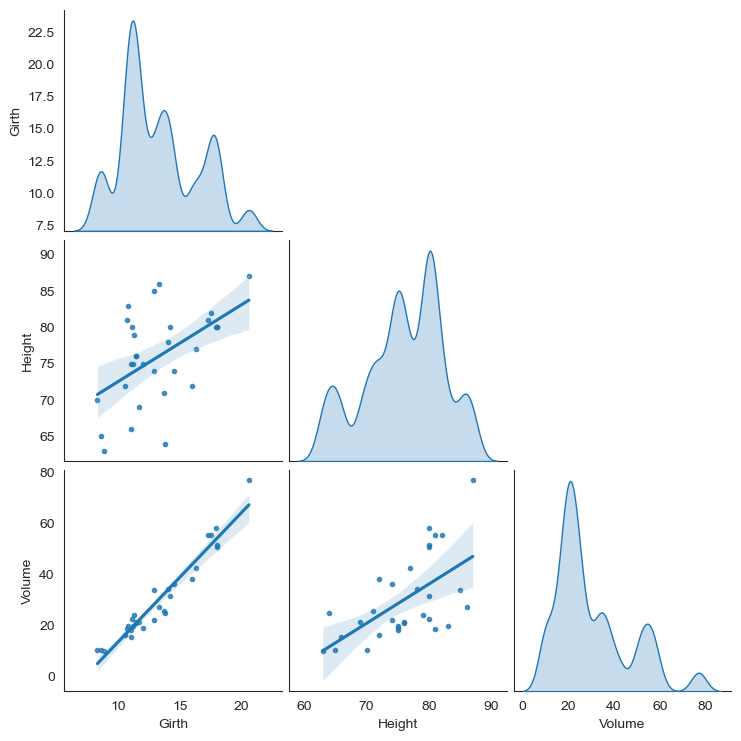

In [24]:
if __name__ == '__main__' : myPairPlot(trees, title = 'Pair Plots')

***Multivariate Adaptive Regression Splines***

pyEarth를 사용

#### Iris Data

In [41]:
iris = get_rdataset('iris').data
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
